In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'C:\Users\tagkd\Desktop\인공지능 연습\타이타닉')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
test[test['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Sibsp : 배에 같이탄 형제/배우자의 수
### Parch : 배에 같이탄 부모/자식의 수
### cabin : 방 이름
### embarked : 탑승장소

In [9]:
def bar_chart(feature):
    survive = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survive,dead])
    df.index = ["Survive","Dead"]
    df.plot(kind='bar',stacked=True,figsize=(10,5))

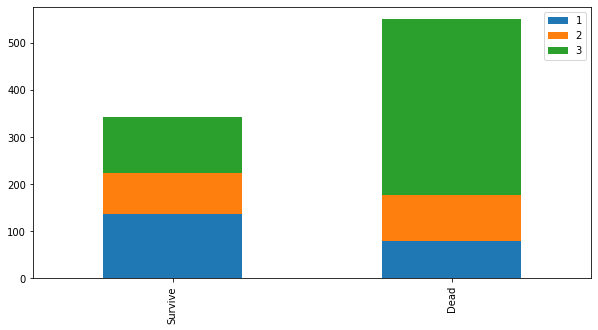

In [10]:
bar_chart('Pclass')
# 평소 사회적 지위가 1등급인 사람이 3등급인 사람에 비해 많이 생존
# 2등급은 반반인듯 함

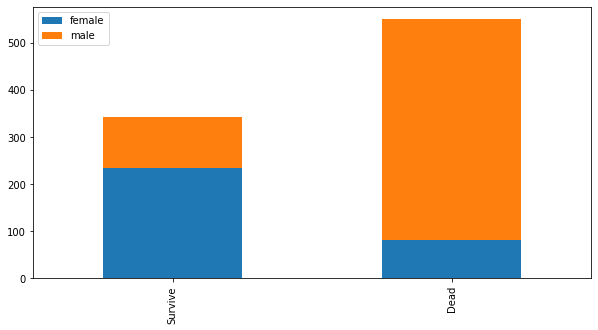

In [11]:
bar_chart('Sex')
# 여자가 남자보다 살확률이 매우 높음

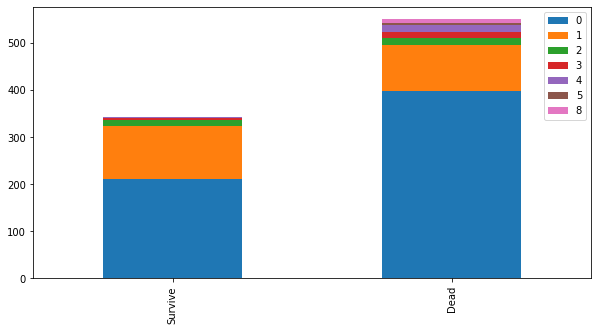

In [12]:
bar_chart("SibSp")
# 4명이상 형제/배우자랑 같이탄 사람은 모두 죽음
# 1명의 형제와 같이탄 사람은 살 확률이 더 높았음 (인과관계는 없을 가능성 높음)

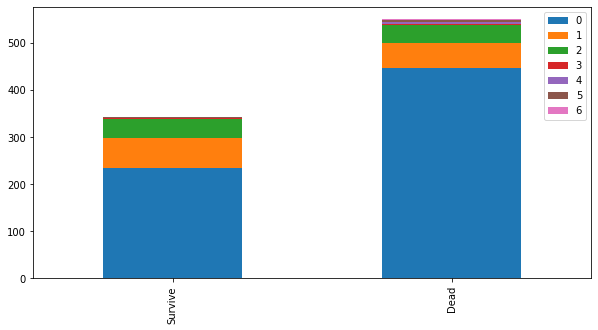

In [13]:
bar_chart("Parch")
#1명이나 2명의 자식,부모를 데리고 온 사람이 살확률이 더 높았음
#그러나 인원이 많아지면 살 확률이 많이 낮음

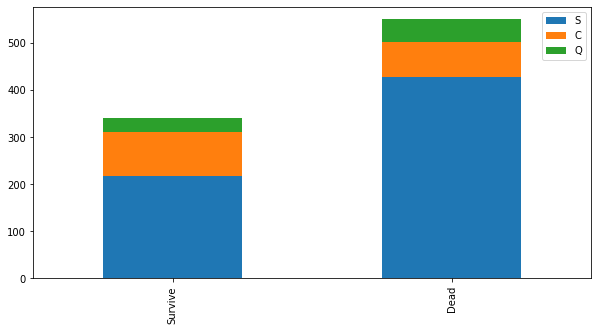

In [14]:
bar_chart('Embarked')

In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
train_test_data = [train,test]

In [17]:
sex_mapping = {'male':0,'female':1}
for i in train_test_data:
    i['Sex'] = i['Sex'].map(sex_mapping)

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [19]:
train.drop('PassengerId',axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [20]:
train['Age'].fillna(train.groupby('Sex')['Age'].transform('median'),inplace = True)
test['Age'].fillna(train.groupby('Sex')['Age'].transform('median'),inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

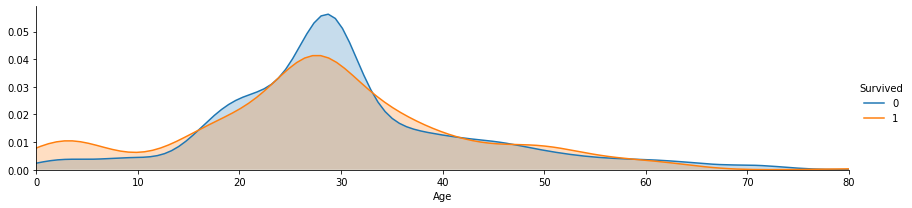

In [21]:
facet = sns.FacetGrid(train,hue='Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show

In [22]:
for data in train_test_data:
    data.loc[data['Age']<=15, 'Age'] = 0
    data.loc[(data['Age']<=34)&(data['Age']>15), 'Age'] = 1
    data.loc[(data['Age']<=46)&(data['Age']>34), 'Age'] = 2
    data.loc[(data['Age']<=60)&(data['Age']>46), 'Age'] = 3
    data.loc[data['Age']>60, 'Age'] = 4

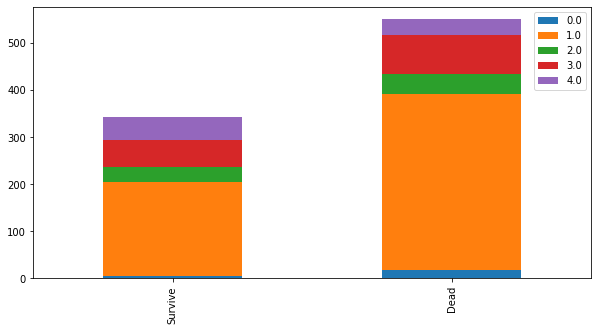

In [23]:
bar_chart('Age')

In [24]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [25]:
for data in train_test_data:
    data.loc[data['Fare']<=50, 'Fare'] = 2
    data.loc[(data['Fare']<=100)&(data['Fare']>50), 'Fare'] = 1
    data.loc[data['Fare']>100, 'Fare'] = 0

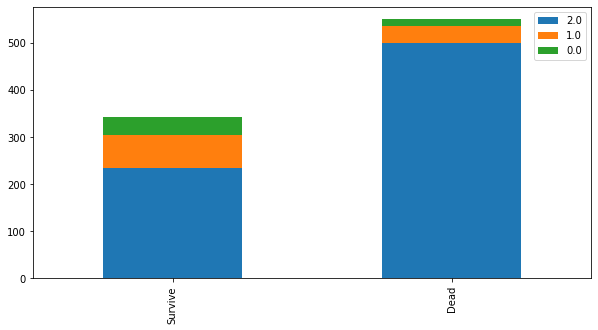

In [26]:
bar_chart('Fare')

In [27]:
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [28]:
for data in train_test_data:
    data['Embarked'] = data['Embarked'].fillna('S')

In [29]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for data in train_test_data:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [30]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [31]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
B73            1
E31            1
B69            1
D30            1
C54            1
Name: Cabin, Length: 147, dtype: int64

In [32]:
for data in train_test_data:
    data['Cabin'] = data['Cabin'].str[:1]

In [33]:
cabin_mapping = {'A':0,"B":0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for data in train_test_data:
    data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [34]:
train['Cabin'].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [35]:
train['Cabin'].fillna(train.groupby('Fare')['Cabin'].transform('median'),inplace = True)
test['Cabin'].fillna(train.groupby('Fare')['Cabin'].transform('median'),inplace = True)

In [36]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = train['SibSp']+train['Parch']+1

In [37]:
train['FamilySize'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64>

In [38]:
family_mapping={1:0,2:2.4,3:2.1,4:1.8,5:1.5,6:1.2,7:0.9,8:0.6,11:0.3}
for data in train_test_data:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [39]:
train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,2.0,1.2,0,2.4
1,2,1,1,1,3.0,1,0,PC 17599,1.0,0.8,1,2.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,2.0,1.2,0,0.0
3,4,1,1,1,3.0,1,0,113803,1.0,0.8,0,2.4


In [40]:
drop_data = ['Ticket','SibSp','Parch']
train = train.drop(drop_data,axis=1)
test = test.drop(drop_data,axis=1)
train = train.drop('PassengerId',axis=1)

In [41]:
train_data=train.drop('Survived',axis=1)
target = train['Survived']

In [42]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,1.0,2.0,1.2,0,2.4
1,1,1,1,3.0,1.0,0.8,1,2.4
2,1,3,1,1.0,2.0,1.2,0,0.0
3,1,1,1,3.0,1.0,0.8,0,2.4
4,0,3,0,3.0,2.0,1.2,0,0.0
5,0,3,0,1.0,2.0,1.2,2,0.0
6,0,1,0,2.0,1.0,1.6,0,0.0
7,0,3,0,4.0,2.0,1.2,0,1.5
8,1,3,1,1.0,2.0,1.2,0,2.1
9,1,2,1,4.0,2.0,1.2,1,2.4


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state = 0)

In [46]:
clf = KNeighborsClassifier(n_neighbors=15)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.78888889 0.78651685 0.74157303 0.70786517 0.82022472 0.78651685
 0.79775281 0.79775281 0.74157303 0.79775281]


In [47]:
round(np.mean(score)*100,2)

77.66

In [48]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score)*100,2))

80.02


In [49]:
clf = RandomForestClassifier(n_estimators=15)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring = scoring)
print(score)

[0.82222222 0.80898876 0.7752809  0.78651685 0.87640449 0.7752809
 0.83146067 0.78651685 0.75280899 0.79775281]


In [50]:
round(np.mean(score)*100,2)

80.13

In [51]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(round(np.mean(score)*100,2))

75.3


In [52]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)

In [53]:
round(np.mean(score)*100,2)

80.8

In [54]:
clf = SVC()
clf.fit(train_data,target)
test_data = test.drop('PassengerId',axis=1).copy()
prediction = clf.predict(test_data)

In [55]:
submission = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})
submission.to_csv('submission.csv',index=False)

In [56]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
